Saving flower.png to flower (2).png
Original Image:


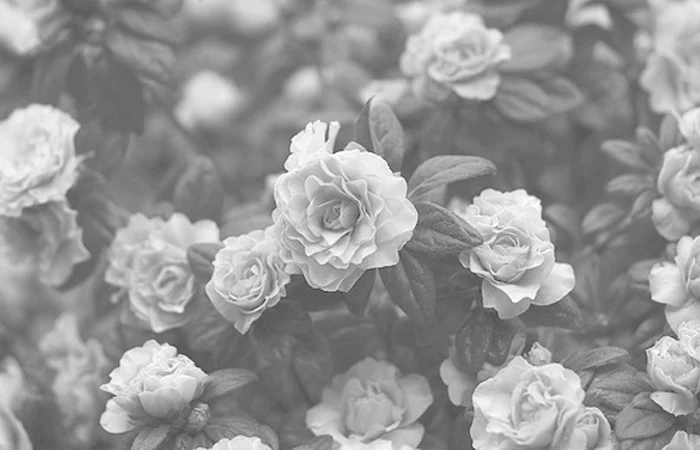

Filtered Image:


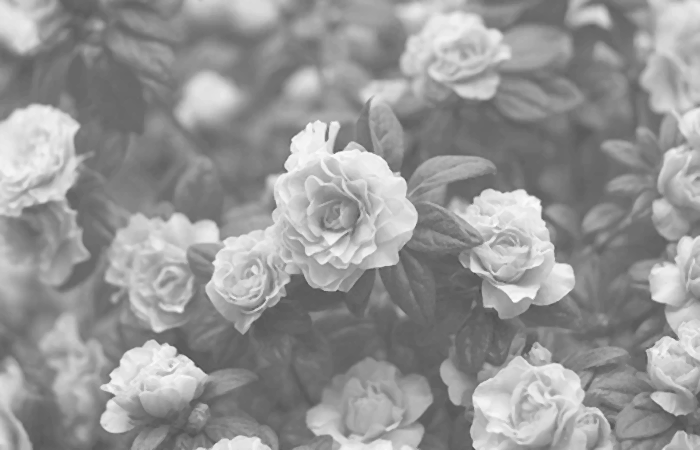

In [5]:
import cv2
import numpy as np
import ipywidgets as widgets
from google.colab import files
from google.colab.patches import cv2_imshow
from IPython.display import display, clear_output

# Function to apply pseudo median filter
def apply_pseudo_median_filter(image, filter_size):
    # Ensure the filter size is odd
    assert filter_size % 2 == 1, "Filter size must be odd"
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Create an empty image with the same dimensions as the original
    output_image = np.zeros_like(image)
    # Calculate the padding size
    pad_size = filter_size // 2
    # Pad the image to handle the edges
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    # Apply the filter
    for i in range(pad_size, image.shape[0] + pad_size):
        for j in range(pad_size, image.shape[1] + pad_size):
            window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            sorted_window = np.sort(window, axis=None)
            median = sorted_window[len(sorted_window) // 2]
            output_image[i - pad_size, j - pad_size] = median
    return output_image

# Function to upload image and apply filter
def upload_and_apply_filter(upload_button):
    # Clear previous outputs
    clear_output()

    # Upload the image
    uploaded = files.upload()
    if not uploaded:
        print("No file uploaded.")
        return

    # Assume only one file is uploaded
    filename = next(iter(uploaded))
    image_content = uploaded[filename]

    # Convert the image content to a numpy array
    image_array = np.frombuffer(image_content, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Apply the pseudo median filter
    filtered_image = apply_pseudo_median_filter(image, 3)

    # Display the original and filtered images
    print("Original Image:")
    cv2_imshow(image)
    print("Filtered Image:")
    cv2_imshow(filtered_image)

# Create the upload button
upload_button = widgets.Button(description="Upload Image")
upload_button.on_click(upload_and_apply_filter)

# Display the upload button
display(upload_button)